In [226]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from config import api_key

In [227]:
api_key

'021bf1d89256205c8528b6d4475485b3'

In [228]:
# assigning random values to variables for now
category_id = 40203
series_id = 'TOTAL.ARNFBUS.A'

In [229]:
# url with category id
url = f"http://api.eia.gov/series/?api_key={api_key}&category_id={category_id}"

#url with series id
url1 = f"http://api.eia.gov/series/?api_key={api_key}&series_id={series_id}"

#Electric system operating data
url4 = f"http://api.eia.gov/category/?api_key={api_key}&category_id=2123635"

#CO2 emissions
url5 = f"http://api.eia.gov/category/?api_key={api_key}&category_id=2251604"

#Electricity
url6 = f"http://api.eia.gov/category/?api_key=Y{api_key}&category_id=0"


In [230]:
print (api_key)

021bf1d89256205c8528b6d4475485b3


In [231]:
# Get fossil fuel information in JSON format
response = requests.get(url3).json()

# First element is general information, second is countries themselves
response

{'request': {'category_id': 711224, 'command': 'category'},
 'category': {'category_id': '711224',
  'parent_category_id': '371',
  'name': 'Total Energy',
  'notes': '',
  'childcategories': [{'category_id': 711225, 'name': 'Energy Overview'},
   {'category_id': 711226, 'name': 'Energy Consumption by Sector'},
   {'category_id': 711227, 'name': 'Petroleum'},
   {'category_id': 711228, 'name': 'Natural Gas'},
   {'category_id': 711229,
    'name': 'Crude Oil and Natural Gas Resource Development'},
   {'category_id': 711230, 'name': 'Coal'},
   {'category_id': 711231, 'name': 'Electricity'},
   {'category_id': 711232, 'name': 'Nuclear Energy'},
   {'category_id': 711233, 'name': 'Energy Prices'},
   {'category_id': 711234, 'name': 'Renewable Energy'},
   {'category_id': 711235, 'name': 'International Petroleum'},
   {'category_id': 711236, 'name': 'Environment'},
   {'category_id': 711237, 'name': 'Appendices'}],
  'childseries': []}}

In [233]:
category_id = 711231

# Get fossil fuel information in JSON format
response = requests.get(url).json()

response

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [120]:
#side note: api ending for CA monthly generation
#API CALL
#TO USEhttp://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=ELEC.GEN.ALL-CA-99.M SERIES
#NAMENet generation : all fuels : California : all sectors : monthly
                

In [123]:
#setting series id to code for "Day-ahead demand forecast for California (region), Hourly"
series_id = 'TOTAL.TECCBUS.M'
#url with series id
url1 = f"http://api.eia.gov/series/?api_key={api_key}&series_id={series_id}"

In [130]:
# Get fossil fuel information in JSON format
commercial = requests.get(url1).json()

commercial

{'request': {'command': 'series', 'series_id': 'TOTAL.TECCBUS.M'},
 'series': [{'series_id': 'TOTAL.TECCBUS.M',
   'name': 'Total Energy Consumed by the Commercial Sector, Monthly',
   'units': 'Trillion Btu',
   'f': 'M',
   'start': '197301',
   'end': '201809',
   'updated': '2018-12-19T15:06:53-0500',
   'data': [['201809', 1422.358],
    ['201808', 1559.876],
    ['201807', 1556.004],
    ['201806', 1474.673],
    ['201805', 1435.837],
    ['201804', 1438.217],
    ['201803', 1618.098],
    ['201802', 1541.143],
    ['201801', 1860.676],
    ['201712', 1759.277],
    ['201711', 1496.851],
    ['201710', 1415.351],
    ['201709', 1378.067],
    ['201708', 1486.039],
    ['201707', 1529.55],
    ['201706', 1437.475],
    ['201705', 1387.991],
    ['201704', 1324.063],
    ['201703', 1561.848],
    ['201702', 1434.572],
    ['201701', 1708.841],
    ['201612', 1737.632],
    ['201611', 1426.912],
    ['201610', 1397.126],
    ['201609', 1420.764],
    ['201608', 1568.878],
    ['2016

In [138]:
units = commercial['series'][0]['units']

monthly_commercial = commercial['series'][0]['data']

units

'Trillion Btu'

In [137]:
for i in monthly_commercial:
    i[0].split

['201808', 1559.876]

In [236]:
commercial_monthly_df = pd.DataFrame(monthly_commercial, columns = ["time", units])

commercial_monthly_df.head()

,time,Trillion Btu
0,201809,1422.358
1,201808,1559.876
2,201807,1556.004
3,201806,1474.673
4,201805,1435.837


In [164]:
import datetime

In [177]:
commercial_monthly_df['time'][0]


'201809'

In [239]:
import re
year = re.findall('....', (commercial_monthly_df['time'][0]))[0]
month = re.findall('..', (commercial_monthly_df['time'][0]))[2]

print(f"year = {year}")
print(f"month = {month}")

year = 2018


In [254]:
year = []
month = []
counter = 0

In [255]:
for time in commercial_monthly_df['time']:
    year.append(re.findall('....', (commercial_monthly_df['time'][counter]))[0])
    month.append(re.findall('..', (commercial_monthly_df['time'][counter]))[2])
    counter = counter + 1


In [256]:
commercial_monthly_df['year'] = year
commercial_monthly_df['month'] = month

In [257]:
commercial_monthly_df.head()

,time,Trillion Btu,year,month
0,201809,1422.358,2018,09
1,201808,1559.876,2018,08
2,201807,1556.004,2018,07
3,201806,1474.673,2018,06
4,201805,1435.837,2018,05


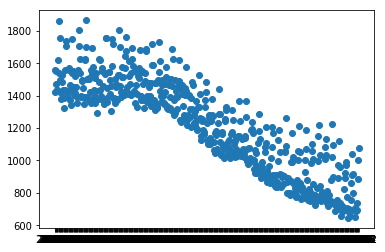

In [259]:
plt.scatter(commercial_monthly_df['time'], commercial_monthly_df['Trillion Btu'], )

In [260]:
X = commercial_monthly_df.as_matrix(columns=commercial_monthly_df.columns[2:])

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [261]:
y = commercial_monthly_df.as_matrix(columns=commercial_monthly_df.columns[1:2])

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [263]:
print(X)

[['2018' '09']
 ['2018' '08']
 ['2018' '07']
 ...
 ['1973' '03']
 ['1973' '02']
 ['1973' '01']]


In [264]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [265]:
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.8007532569223172


In [ ]:
#make plot better
#widen x axis
#add tickmark labels
#add axis labels
#add title
#make it in the right order?



#get more info on model-
#y=mx+b formula?
#what does r2 score mean?
#what is the p value